# Usage (quickest version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.4.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.


## Start scenario analysis
As an example, we will analysis the number of cases in Italy.

In [5]:
scenario = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records

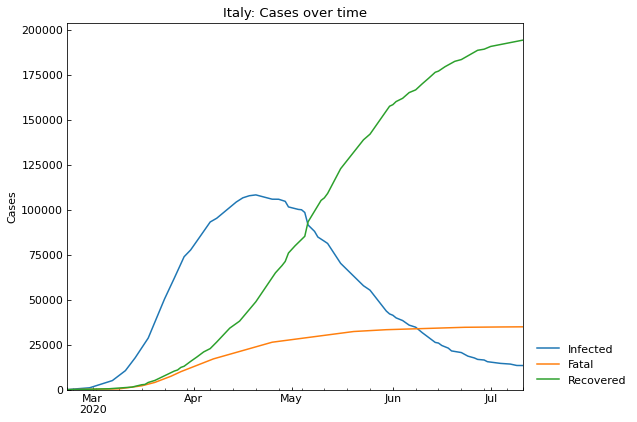

In [6]:
_ = scenario.records()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters.

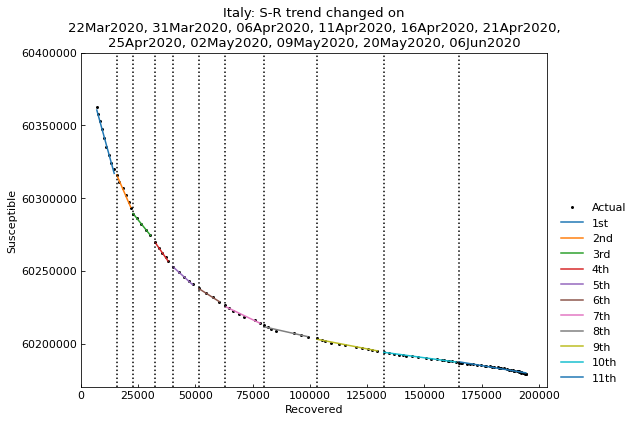

In [7]:
scenario.trend()

In [8]:
scenario.summary()

,Type,Start,End,Population
1st,Past,22Mar2020,30Mar2020,60421760
2nd,Past,31Mar2020,05Apr2020,60421760
3rd,Past,06Apr2020,10Apr2020,60421760
4th,Past,11Apr2020,15Apr2020,60421760
5th,Past,16Apr2020,20Apr2020,60421760
6th,Past,21Apr2020,24Apr2020,60421760
7th,Past,25Apr2020,01May2020,60421760
8th,Past,02May2020,08May2020,60421760
9th,Past,09May2020,19May2020,60421760
10th,Past,20May2020,05Jun2020,60421760


## Hyperparameter estimation of ODE models
As an example, use SIR-F model.

In [9]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	11th phase with SIR-F model finished 95 trials in 0 min 15 sec.

	1st phase with SIR-F model finished 54 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 50 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 54 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 54 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 54 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 53 trials in 0 min 5 sec.

	8th phase with SIR-F model finished 40 trials in 0 min 5 sec.

	7th phase with SIR-F model finished 143 trials in 0 min 15 sec.

	9th phase with SIR-F model finished 121 trials in 0 min 15 sec.

	10th phase with SIR-F model finished 122 trials in 0 min 15 sec.

Completed optimization. Total: 1 min 42 sec

## Show the history of reproduction number

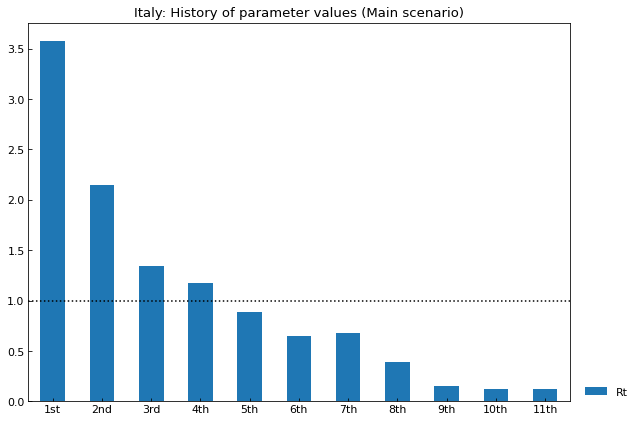

In [10]:
_ = scenario.param_history(targets=["Rt"], divide_by_first=False)

## Simulate the number of cases

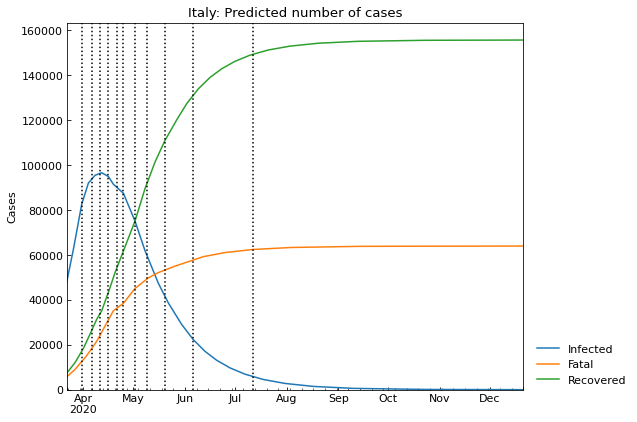

In [11]:
scenario.add_phase(end_date="01Jan2021")
_ = scenario.simulate()